## Question 3.1

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("cereal.csv")
data = data[1:]
data.reset_index(drop=True, inplace=True)

In [3]:
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912
4,Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843


In [4]:
mu = 0
sigma = 5
sodium = list(data['sodium'].values)
sodium2 = [(2*int(sodium[i]))+int(np.random.normal(mu, sigma, 1)[0]) for i in range(data.shape[0])]
data.insert(7, "sodium2", sodium2, True)

In [5]:
data.drop(["name"], axis =1, inplace = True)

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
mfr_enc = OneHotEncoder()
mfr_df = pd.DataFrame(mfr_enc.fit_transform(data[['mfr']]).toarray())
mfr_columns = list(mfr_df.columns)
encoded_mfr_columns = []
for i in mfr_columns:
    encoded_mfr_columns.append("mfr_"+str(i))
mfr_df.set_axis(encoded_mfr_columns, axis=1, inplace=True)
data.drop(["mfr"],axis = 1,inplace = True)
data = data.join(mfr_df)

In [8]:
type_enc = OneHotEncoder()
type_df = pd.DataFrame(type_enc.fit_transform(data[['type']]).toarray())
type_columns = list(type_df.columns)
encoded_type_columns = []
for i in type_columns:
    encoded_type_columns.append("type_"+str(i))
type_df.set_axis(encoded_type_columns, axis=1, inplace=True)
data.drop(["type"],axis = 1,inplace = True)
data = data.join(type_df)

In [9]:
data = data.astype("float")

In [10]:
X = data.drop(['rating'],axis = 1)
y = data["rating"]

In [11]:
from sklearn.model_selection import train_test_split,RepeatedKFold,cross_val_score

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.1)

Linear Regression Models

In [13]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

Ridge

In [14]:
model_ridge = Ridge()
model_ridge.fit(X_train,y_train)

Ridge()

In [15]:
import matplotlib.pyplot as plt

Lasso

In [16]:
model_lasso = Lasso()
model_lasso.fit(X_train,y_train)

Lasso()

ElasticNet

In [17]:
model_elasticnet = ElasticNet()
model_elasticnet.fit(X_train,y_train)

ElasticNet()

Linear regression

In [18]:
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)

LinearRegression()

## Question 3.2

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold, GridSearchCV, train_test_split, cross_val_score
ridge_model = GridSearchCV(Ridge(),{'alpha':[0.0001,0.0005,0.005,0.001,0.01,0.05,0.1,0.2,0.5,1]},
                         cv=5, scoring='r2')

In [20]:
ridge_model.fit(X,y)
score = pd.DataFrame(ridge_model.cv_results_).iloc[:,4:][['param_alpha','mean_test_score']]

Text(0, 0.5, 'R2')

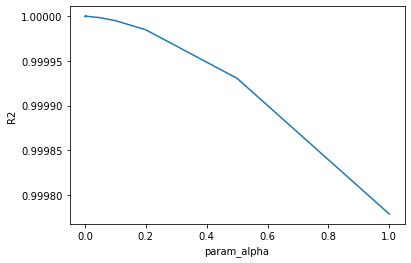

In [21]:
plt.plot(score['param_alpha'],score['mean_test_score'])
plt.xlabel("param_alpha")
plt.ylabel("R2")

# Question 3.3

In [24]:
pip install mlxtend --upgrade

  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [25]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import mean_squared_error

Ridge Bias-Variance

In [26]:
ridge_mse, ridge_bias, ridge_var = bias_variance_decomp(model_ridge, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=123)
ridge_y_pred=model_ridge.predict(X_test)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % ridge_mse)
print('Avg Bias: %.3f' % ridge_bias)
print('Avg Variance: %.3f' % ridge_var)
print('Mean Square error by Sckit-learn lib: %.3f' % mean_squared_error(y_test,ridge_y_pred))


MSE from bias_variance lib [avg expected loss]: 0.045
Avg Bias: 0.026
Avg Variance: 0.019
Mean Square error by Sckit-learn lib: 0.041


Lasso Bias-Variance

In [27]:
lasso_mse, lasso_bias, lasso_var = bias_variance_decomp(model_lasso, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=123)
lasso_y_pred=model_lasso.predict(X_test)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % lasso_mse)
print('Avg Bias: %.3f' % lasso_bias)
print('Avg Variance: %.3f' % lasso_var)
print('Mean Square error by Sckit-learn lib: %.3f' % mean_squared_error(y_test,lasso_y_pred))


MSE from bias_variance lib [avg expected loss]: 5.781
Avg Bias: 4.134
Avg Variance: 1.647
Mean Square error by Sckit-learn lib: 3.816


ElasticNet Bias-Variance

In [28]:
elasticnet_mse, elasticnet_bias, elasticnet_var = bias_variance_decomp(model_elasticnet, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=123)
elasticnet_y_pred=model_elasticnet.predict(X_test)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % elasticnet_mse)
print('Avg Bias: %.3f' % elasticnet_bias)
print('Avg Variance: %.3f' % elasticnet_var)
print('Mean Square error by Sckit-learn lib: %.3f' % mean_squared_error(y_test,elasticnet_y_pred))


MSE from bias_variance lib [avg expected loss]: 6.939
Avg Bias: 5.526
Avg Variance: 1.412
Mean Square error by Sckit-learn lib: 5.081


LinearRegression Bias-Variance

In [29]:
linear_mse, linear_bias, linear_var = bias_variance_decomp(model_linear, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', random_seed=123)
linear_y_pred=model_linear.predict(X_test)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % linear_mse)
print('Avg Bias: %.3f' % linear_bias)
print('Avg Variance: %.3f' % linear_var)
print('Mean Square error by Sckit-learn lib: %.3f' % mean_squared_error(y_test,linear_y_pred))


MSE from bias_variance lib [avg expected loss]: 0.000
Avg Bias: 0.000
Avg Variance: 0.000
Mean Square error by Sckit-learn lib: 0.000
